# Fun with Color

This is inspired from the first homework for the computer vision course taught at University of Washington by instructor Joseph Redmon. <br>
https://github.com/pjreddie/vision-hw0

The original homework was to be solved in c language, however for simplicity, i have used python. (Also, its easy)

In [5]:
# importing libraris
import numpy as np
import cv2 

import matplotlib.pyplot as plt

# setting size of the plot 
plt.rcParams['figure.figsize'] = (14, 8)

In [6]:
# reading the image 
img = cv2.imread('data/dog.jpg')

## This is image we are workign on ->

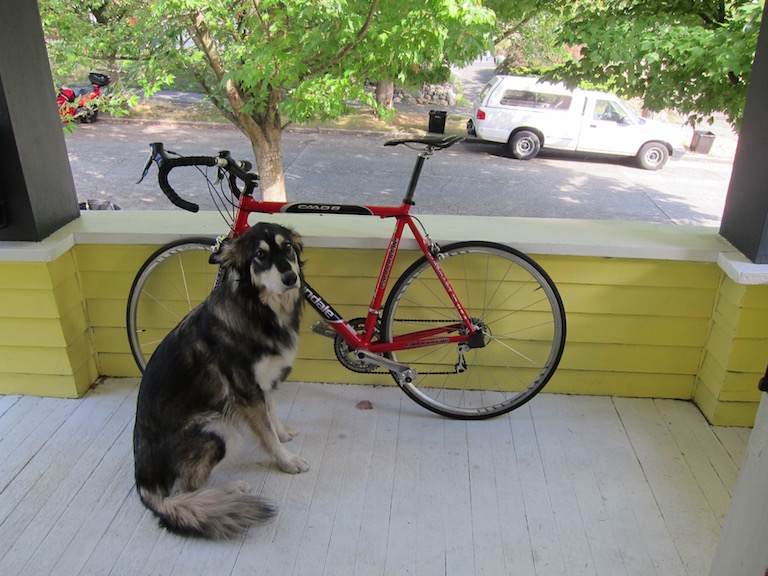

In [7]:
# lets see what is the type of it 
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(576, 768, 3)


The img is a numpy array, so when we are reading an image, its being stored as an numpy array only. We can now use all the numpy operations on this image. Also, the shape of the numpy array is (576, 768, 3)

This means that the image is like a cube, where height and width is 576 and 768, and depth (channels) is 3. These 3 channels contains the R, G, B pixels of the image

But, before dicussing about the channels, lets first try to print the image

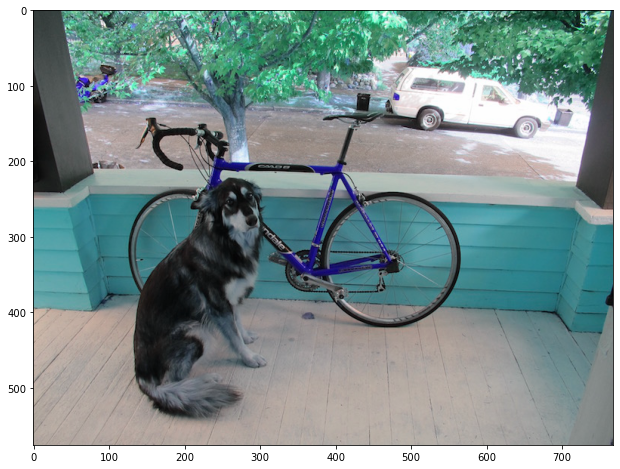

In [8]:
plt.imshow(img)

hmm..If we compare this to the original image, looks the the Red , Blue, Green colors are a bit interchanged. 

#### That's because open cv reads an image as BGR, where originally it is RGB. So, we now need to convert it back to RGB form

# Using numpy to get RGB

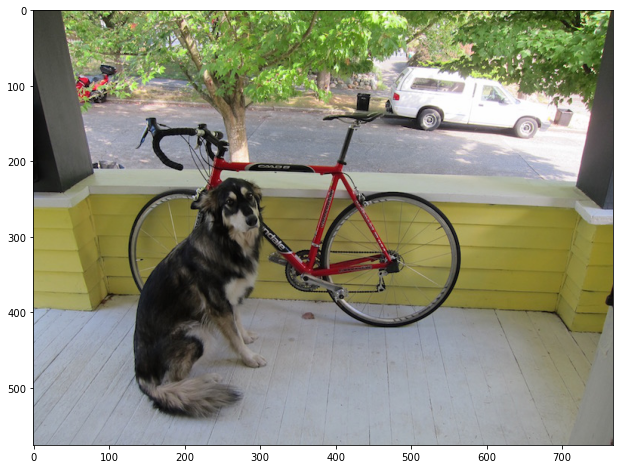

In [9]:
# split the bgr values 
b,g,r = img[:,:,0], img[:,:,1], img[:,:,2]

# make a new numpy array 
rgb_numpy = np.zeros(img.shape)

# add channels in the new array as we require 
rgb_numpy[:,:,0], rgb_numpy[:,:,1], rgb_numpy[:,:,2] = r , g, b 

# make sure the shape is (576,768,3)
# print(rgb_numpy.shape)

# show the image 
plt.imshow(rgb_numpy.astype(int)) # Converting it to int, as otherwise it considers 
                                  # it as float and clips the values between 0 to 1 

# using Open CV

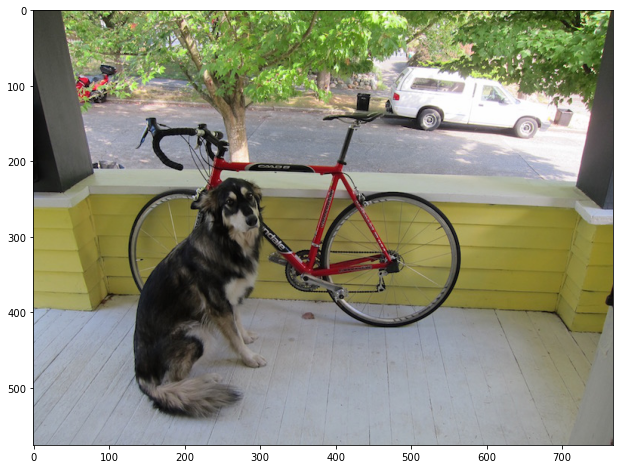

In [10]:
# its easy using a library (open cv)
rgb_cv = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# showing the image 
plt.imshow(rgb_cv)

In [39]:
# save rgb to img
img = rgb_cv

# Effect of each channel of the image

To see how R, G, B channel contribute to the final image, we can see how the image would look like if we remove a channel 

In [40]:
def remove_channel(img,channel):
    '''
    INPUT - 
        img - image from which we  will make pixel values for a particular channel 0
        channel - 0 for red, 1 for green, 2 for blue 
    OUTPUT - 
        temp - image in which a given channel has 0 pixel value 
    '''
    temp = np.copy(img)
    temp[:,:,channel] = 0
    return temp

In [41]:
img_no_red = remove_channel(img,0)
img_no_green = remove_channel(img,1)
img_no_blue = remove_channel(img,2)

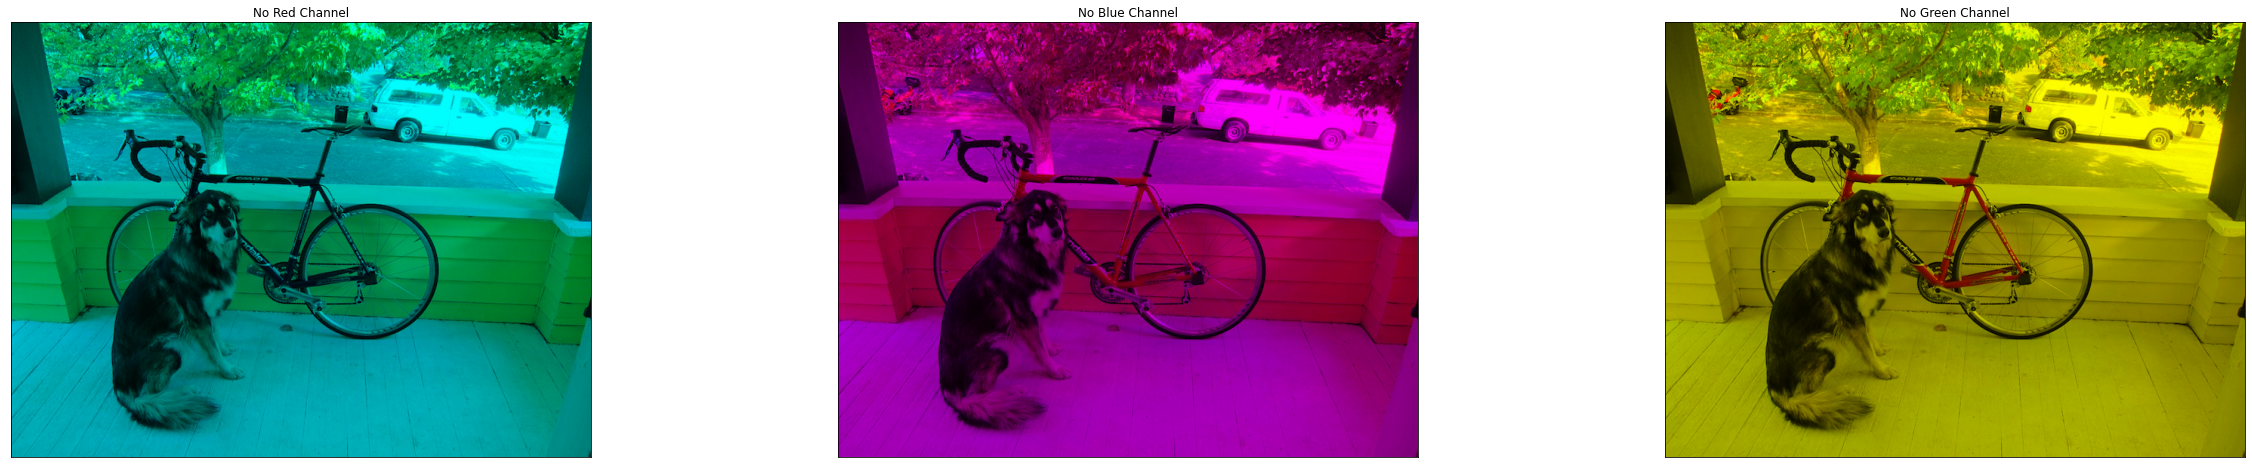

In [42]:
fit,ax = plt.subplots(1,3,figsize = (42,8))
ax[0].imshow(img_no_red)
ax[0].set_title('No Red Channel')
ax[1].imshow(img_no_green)
ax[1].set_title('No Blue Channel')
ax[2].imshow(img_no_blue)
ax[2].set_title('No Green Channel')
for i in range(3):
    ax[i].set_xticks([])
    ax[i].set_yticks([])

## The above images are a bit small. To get more insight ,an image with no REDness in it would look some thing like - 
### Only blue and green channel are contributing to this image

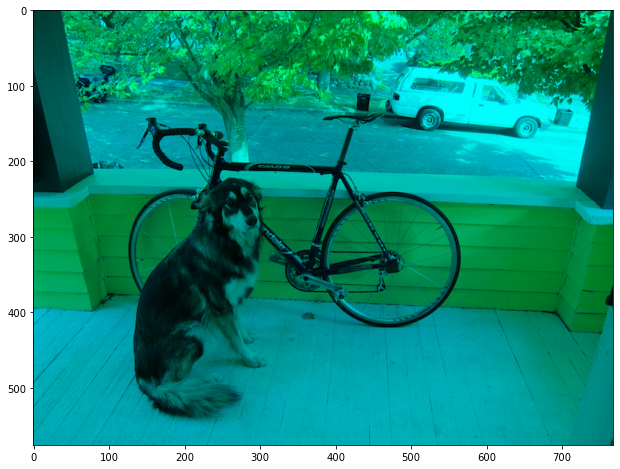

In [43]:
plt.imshow(img_no_red)

Suppose a person can;t see red color, then this is how he would percieve this image. 

## NO - Green
An image with no GREENness...

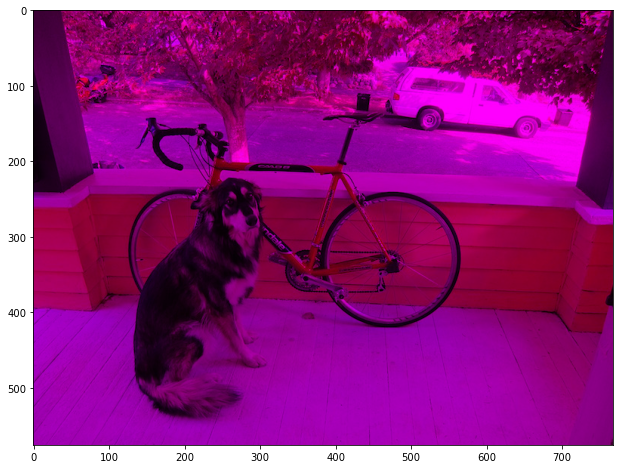

In [46]:
plt.imshow(img_no_green)

The above image kind of hurt our eyes, that's because we have removed green, the part which we are more sensitive and used to. 

# Converting to GrayScale

Now, we are interested in converting RGB to Grayscale, so the final image will have only 1 channel instead of 3. This will result in a 2-D Matrix

So, how would we convert a 3-D Matrix (or tensor) to a 2-D. 
One thing we can do is simply for each pixel, we take the mean of the values, and consider it as the value of grayscale pixel

(576, 768)


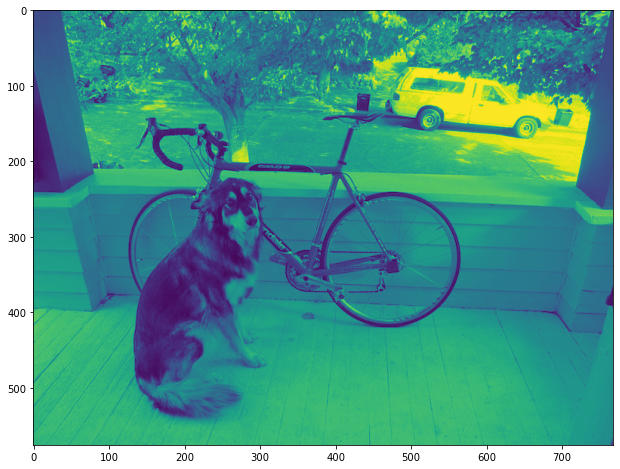

In [47]:
gray_mean = np.mean(img,axis = 2)
print(gray_mean.shape)
plt.imshow(gray_mean)

The above image is a 2-D image, (see the gray_mean.shape)
<br> In this case we are considering that Red Green and Blue channel each have same contribution to the final representation (33%), but this is not true when it comes to real world. 

In real world we are more sensitive to green, then red, least for blue 

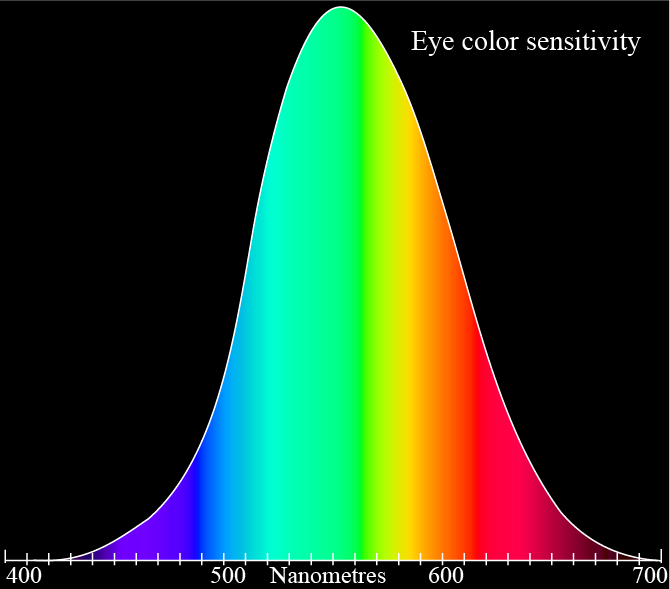

Therefore green will have more contribution to the grey scale, followed by red , and then blue 

## Converting to grayscale using numpy 

In real world, green contributes to about 58% to gray scale, red 30%, and blue 11 % (simplified numbers)

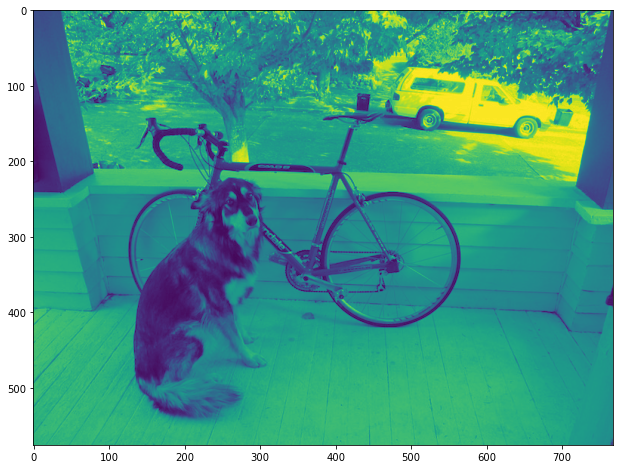

In [48]:
r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]
gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

plt.imshow(gray)

# Converting using open CV

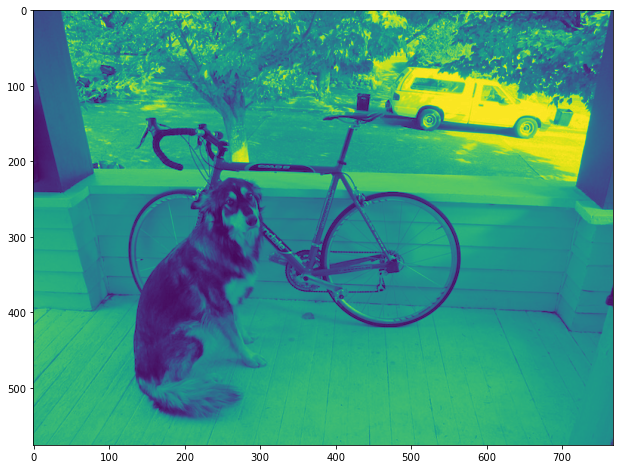

In [49]:
gray_cv = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

plt.imshow(gray_cv)

# Converting RGB to HSV

WIll add this soon